This Notebook shows how I learnt to calculate Customer Lifetime Value in Python thanks to Avinash Navlani from Data Camp tutorials.
The customer lifetime value (CLV) metric might not sound very important, but failing to calculate it can put you behind your competitors. CLV tells you how well you’re resonating with your audience, how much your customers like your products or services, and what you’re doing right — as well as how you can improve.

This Notebook covers the following topics:

1. Introduction
2. CLTV Formulas
3. Implementing CLTV in Python
4. Prediction model for CLTV

In [649]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [651]:
#Now after calling the required libraries in python, let us ingest the data from our local location
data = pd.read_excel("C:/Users/USER/Desktop/Data Science Projects/Customer Lifetime Value Prediction/Online Retail.xlsx")

In [652]:
#let us check the new data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Exploring the data set

In [653]:
# checking number of rows and columns
data.shape

(541909, 8)

In [654]:
#to see some of the descriptive stats we can call the describe function on the dataframe
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [655]:
#what variables do we have in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [656]:
#number of entries in our data
len(data)

541909

In [657]:
#Find the duplicate CustomerIDs 
data[data.duplicated('CustomerID')].count()

InvoiceNo      537536
StockCode      537536
Description    536083
Quantity       537536
InvoiceDate    537536
UnitPrice      537536
CustomerID     402457
Country        537536
dtype: int64

In [658]:
#number of unique Customers
data.CustomerID.nunique()

4372

In [659]:
#dropping duplicate records for customers
new_data = data[['CustomerID','Country']].drop_duplicates()

In [660]:
len(new_data)

4389

In [661]:
# Number of customers in each country
new_data.Country.value_counts()

United Kingdom          3951
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Netherlands                9
Australia                  9
Denmark                    9
Japan                      8
Sweden                     8
Cyprus                     8
Poland                     6
Unspecified                5
Israel                     5
USA                        4
Canada                     4
EIRE                       4
Greece                     4
Bahrain                    3
Malta                      2
United Arab Emirates       2
RSA                        1
Czech Republic             1
Lithuania                  1
Iceland                    1
Saudi Arabia               1
European Community         1
Singapore     

In [662]:
# seeting colors for plotting bar chart
my_colors = 'rgbkymc'  #red, green, blue, black, etc.

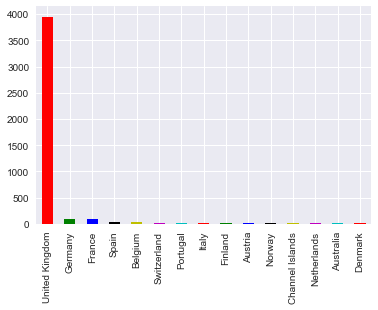

In [663]:
#Top ten country's customer
new_data.Country.value_counts()[:15].plot(kind='bar',color=my_colors)

In [665]:
#filter data for United Kingdom customers.
uk_data = data[data['Country'] == 'United Kingdom']

In [666]:
len(uk_data)

495478

In [667]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [668]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      495478 non-null object
StockCode      495478 non-null object
Description    494024 non-null object
Quantity       495478 non-null int64
InvoiceDate    495478 non-null datetime64[ns]
UnitPrice      495478 non-null float64
CustomerID     361878 non-null float64
Country        495478 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [669]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


Here, we can observe some of the customers have ordered in a negative quantity. Dropping the negative order quantities can in reality a good idea, as returned or cancelled orders can appear as negative quantities, gross values etc. in your data. Therefore we will not be dropping them entries. 

In [687]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

Filter required Columns
Here, we filter the necessary columns for calculating CLTV. We only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.

1. CustomerID will uniquely define your customers.
2. InvoiceDate help you calculate numbers of days customer stayed with your product.
3. InvoiceNo helps you to count the number of time transaction performed(frequency).
4. Quantity is purchased item units in each transaction
5. UnitPrice of each unit purchased by the customer will help you to calculate the total purchased amount.

In [688]:
#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

Here, we are going to perform the following operations:

1. Calculate the number of days between the present date and the date of last purchase from each customer.
2. Calculate the number of orders for each customer.
3. Calculate sum of purchase price for each customer.

In [689]:
uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

In [690]:
uk_data_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,1970-01-01 00:00:00.000000000,2,0,0.00
12747.0,1970-01-01 00:00:00.000000366,103,1275,4196.01
12748.0,1970-01-01 00:00:00.000000372,4642,24210,29072.10
12749.0,1970-01-01 00:00:00.000000209,231,1422,3868.20
12820.0,1970-01-01 00:00:00.000000323,59,722,942.34


In [691]:
# Change the name of columns
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,1970-01-01 00:00:00.000000000,2,0,0.00
12747.0,1970-01-01 00:00:00.000000366,103,1275,4196.01
12748.0,1970-01-01 00:00:00.000000372,4642,24210,29072.10
12749.0,1970-01-01 00:00:00.000000209,231,1422,3868.20
12820.0,1970-01-01 00:00:00.000000323,59,722,942.34


##### Calculate CLTV using following formula:

 CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

 Customer Value = Average Order Value * Purchase Frequency

In [692]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']

In [693]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,1970-01-01 00:00:00.000000000,2,0,0.00,0.000000
12747.0,1970-01-01 00:00:00.000000366,103,1275,4196.01,40.737961
12748.0,1970-01-01 00:00:00.000000372,4642,24210,29072.10,6.262839
12749.0,1970-01-01 00:00:00.000000209,231,1422,3868.20,16.745455
12820.0,1970-01-01 00:00:00.000000323,59,722,942.34,15.971864


In [694]:
#Calculate Purchase Frequency
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]

In [695]:
# Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]

In [696]:
#Churn Rate
churn_rate=1-repeat_rate

In [697]:
purchase_frequency,repeat_rate,churn_rate

(91.614683544303801, 0.9807594936708861, 0.019240506329113893)

##### Calculate Profit Margin
Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [698]:
# Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05

In [699]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,1970-01-01 00:00:00.000000000,2,0,0.00,0.000000,0.0000
12747.0,1970-01-01 00:00:00.000000366,103,1275,4196.01,40.737961,209.8005
12748.0,1970-01-01 00:00:00.000000372,4642,24210,29072.10,6.262839,1453.6050
12749.0,1970-01-01 00:00:00.000000209,231,1422,3868.20,16.745455,193.4100
12820.0,1970-01-01 00:00:00.000000323,59,722,942.34,15.971864,47.1170


##### Calcualte Customer Lifetime Value

In [700]:
# Customer Value
uk_data_group['CLV']=(uk_data_group['avg_order_value']*purchase_frequency)/churn_rate

In [701]:
#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CLV']*uk_data_group['profit_margin']

In [702]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,1970-01-01 00:00:00.000000000,2,0,0.00,0.000000,0.0000,0.000000,0.000000e+00
12747.0,1970-01-01 00:00:00.000000366,103,1275,4196.01,40.737961,209.8005,193975.946191,4.069625e+07
12748.0,1970-01-01 00:00:00.000000372,4642,24210,29072.10,6.262839,1453.6050,29820.838919,4.334772e+07
12749.0,1970-01-01 00:00:00.000000209,231,1422,3868.20,16.745455,193.4100,79734.363158,1.542142e+07
12820.0,1970-01-01 00:00:00.000000323,59,722,942.34,15.971864,47.1170,76050.872997,3.583289e+06


##### Prediction Model for CLTV
Let's build the CLTV prediction model.

Here, we are going to predict CLTV using Linear Regression Model.

Let's first use the data loaded and filtered above.

In [703]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,1970-01-01 00:00:00.000000000,2,0,0.00,0.000000,0.0000,0.000000,0.000000e+00
12747.0,1970-01-01 00:00:00.000000366,103,1275,4196.01,40.737961,209.8005,193975.946191,4.069625e+07
12748.0,1970-01-01 00:00:00.000000372,4642,24210,29072.10,6.262839,1453.6050,29820.838919,4.334772e+07
12749.0,1970-01-01 00:00:00.000000209,231,1422,3868.20,16.745455,193.4100,79734.363158,1.542142e+07
12820.0,1970-01-01 00:00:00.000000323,59,722,942.34,15.971864,47.1170,76050.872997,3.583289e+06


In [704]:
#Extract month and year from InvoiceDate.
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

In [705]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


The pivot table takes the columns as input, and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.

In [706]:
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()

In [707]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,659.42,4177.68,1070.27,389.64,418.77,1113.27,2006.26,1011.94,2224.42,9295.57,1385.84,4218.65
3,12749.0,0.00,1750.45,0.00,763.06,0.00,0.00,0.00,0.00,0.00,782.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77


Let's sum all the months sales.

In [708]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [709]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1100.37,659.42,4177.68,1070.27,389.64,418.77,1113.27,2006.26,1011.94,2224.42,9295.57,1385.84,4218.65,27971.73
3,12749.0,0.00,1750.45,0.00,763.06,0.00,0.00,0.00,0.00,0.00,782.10,572.59,0.00,0.00,3868.20
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


Correlation Analysis

In [710]:
corr_data = sale.drop('CustomerID',axis=1)

In [712]:
corr_data.corr()['CLV']

month_yr
Apr-2011    0.436127
Aug-2011    0.547306
Dec-2010    0.715782
Dec-2011    0.651282
Feb-2011    0.647744
Jan-2011    0.506695
Jul-2011    0.817266
Jun-2011    0.788750
Mar-2011    0.733733
May-2011    0.861338
Nov-2011    0.765372
Oct-2011    0.799051
Sep-2011    0.841186
CLV         1.000000
Name: CLV, dtype: float64

So the correlation shows some really good correlation across different months

##### Selecting Feature

Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Select latest 8 month as independent variable.

In [714]:
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011','Jun-2011','May-2011']]
y=sale[['CLV']]

##### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [715]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

##### Model Development
First, we import the Linear Regression module and create a Linear Regression object. Then, fit our model on the train set using fit() function and perform prediction on the test set using predict() function.

In [716]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [717]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[ 37.22078653]
[[ 1.23434039  0.87438795  1.34339621  1.27188815  1.54926249  1.49336862
   1.16857671  2.04217529]]


##### How Well Does the Model Fit the data?
In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. Higher value or R-squared is considered better because it indicates the larger variance explained by the model.

In [718]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.988642967294


This model has a higher R-squared (0.98). This model provides a better fit to the data.


Predicting unseen data

In [719]:
new_data = np.array([100,0,50,100,60,0,100,0]).reshape(1, -1)

In [720]:
new_data.shape

(1, 8)

In [721]:
new_pred=linreg.predict(new_data)

In [722]:
print('The CLV for the new customer is : $',new_pred[0])

The CLV for the new customer is : $ [ 564.82687098]



##### Model Evaluation
For regression problems following evaluation metrics used (Ritchie Ng):

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
2. Mean Squared Error (MSE) is the mean of the squared errors.
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [723]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 355.2779572
MSE 1183576.52643
RMSE: 1087.92303332
